## SIR Model

In [32]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

d = {'day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
     'sus': [763, 760, 755, 737, 671, 482, 312, 224, 134,  75,  53,  53,  53,  53, 53],
     'in_bed': [0,3, 7, 22, 78, 233, 300, 256, 233, 189, 128, 72, 33, 11, 6],}

influenza = pd.DataFrame(d)
influenza

,day,sus,in_bed
0,0,763,0
1,1,760,3
2,2,755,7
3,3,737,22
4,4,671,78
5,5,482,233
6,6,312,300
7,7,224,256
8,8,134,233
9,9,75,189


Text(0, 0.5, 'Infected')

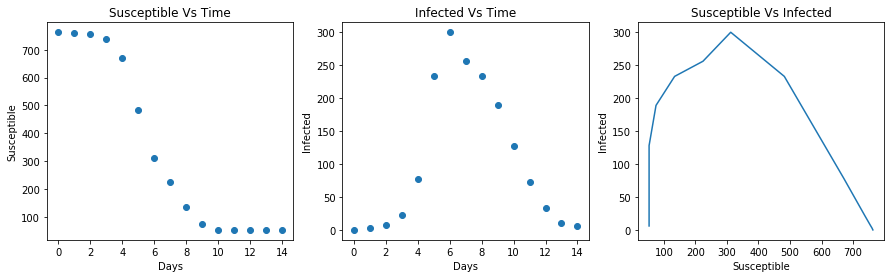

In [33]:
f, axes = plt.subplots(1,3, figsize=[15,4])

axes[0].plot('day', 'sus', 'o', data = influenza)
axes[0].set_title('Susceptible Vs Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Susceptible')

axes[1].plot(influenza['day'], influenza['in_bed'],'o')
axes[1].set_title('Infected Vs Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Infected')

axes[2].plot(influenza['sus'], influenza['in_bed'])
axes[2].set_title('Susceptible Vs Infected')
axes[2].set_xlabel('Susceptible')
axes[2].set_ylabel('Infected')

### Parameter Estimates:

In this case we know the recovery rate: It averages about 2.25 days. That means that $\gamma =  1/2.25 = .44$. Next, we need to estimate $\beta$. There are a few ways we could do this:

$$
0 = I' = \beta IS - \gamma I
$$

implies that $I$ should  have a critical point at $S = \gamma/\beta$. We find that $I$ is at a max when $(S,I) = (312,300)$, so 

$$
312 = \gamma/\beta\,\hspace{3em} \beta = .44/312 = 0.0014
$$


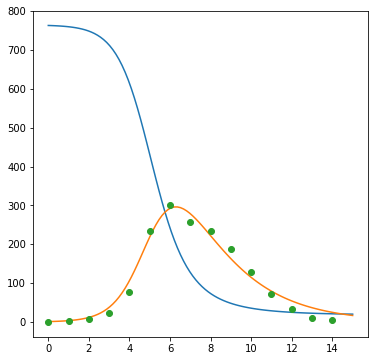

In [39]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,15,100)

sol = odeint(model, [763,1], t, (.44/200,.44))

plt.figure(figsize=[6,6])

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

#### Estimate using S'(3):

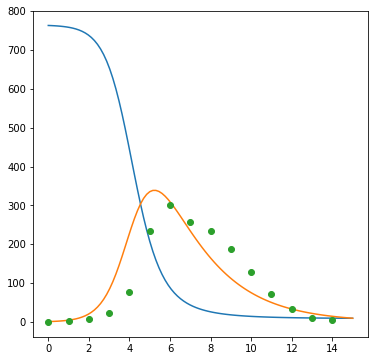

In [38]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,15,100)

sol = odeint(model, [763,1], t, (.002590,.44))

plt.figure(figsize=[6,6])

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

### Improving?

This doesn't look quite correct. But we notice  as well that the 6'th day is kind of an outlier, it looks a little weird. The "smooth" maximum may actually fall more between the 7'th day. This would then yield

$$
\beta = .44/224
$$

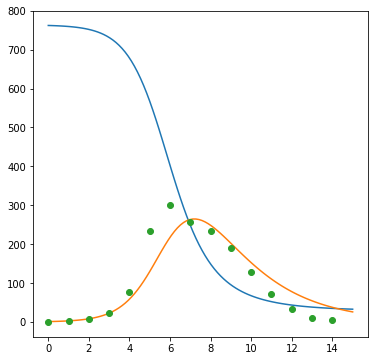

In [17]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,15,100)

sol = odeint(model, [762,1], t, (.44/224,.44))
    
plt.figure(figsize=[6,6])

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

### Inflection Point Calculation:

Assume now that we only has a small portion of the data:

Text(0, 0.5, 'Infected')

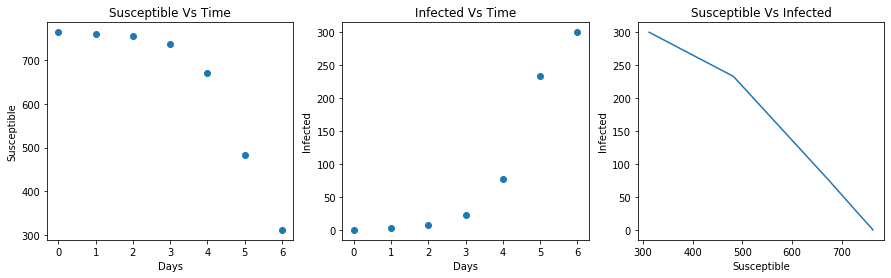

In [18]:
f, axes = plt.subplots(1,3, figsize=[15,4])

influenza_h = influenza.head(7)

axes[0].plot('day', 'sus', 'o', data = influenza_h)
axes[0].set_title('Susceptible Vs Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Susceptible')

axes[1].plot(influenza_h['day'], influenza_h['in_bed'],'o')
axes[1].set_title('Infected Vs Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Infected')

axes[2].plot(influenza_h['sus'], influenza_h['in_bed'])
axes[2].set_title('Susceptible Vs Infected')
axes[2].set_xlabel('Susceptible')
axes[2].set_ylabel('Infected')

This squares with another interpretation of the parameter $\beta$:

$$
0 = S'' = -\beta S' I - \beta I' S = -\beta(- \beta SI^2 + \beta S^2 I - \gamma SI)
$$

factoring out a copy of $IS$ we have

$$
0 = \beta I - \beta S  + \gamma
$$

or

$$
S = I + \gamma/\beta
$$

We can use (S,I) = (482, 233)

$$
482 = 233 + .44/\beta
$$

and solve for

$$
\beta = \frac{\gamma}{S-I}
$$

This is actually a pretty reasonable estimate and gives a prediction for the results:

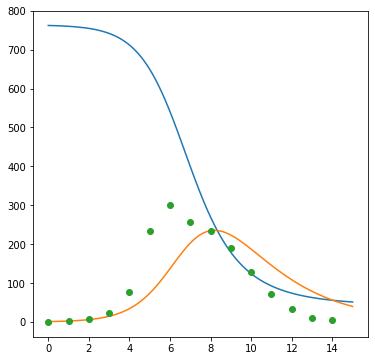

In [20]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,15,100)

sol = odeint(model, [762,1], t, (.44/249,.44))

plt.figure(figsize=[6,6])

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

### Confidence?

We can form an imprecise measure of confidence by adjusting these parameters:

|Day|S|I|
|---|-|-|
|4 |	671 |	78
|5 |	482 |	233
|6 |	312 |	300

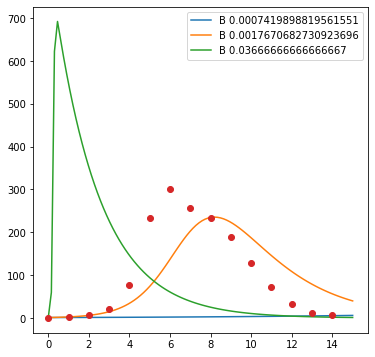

In [22]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,15,100)
plt.figure(figsize=[6,6])

for S,I in [[671,78],[482, 233], [312,300]]:
    sol = odeint(model, [762,1], t, (.44/(S-I),.44))
    plt.plot(t, sol[:,1], label="B "+ str(.44/(S-I)))

#plt.plot(t, sol[:,0])
plt.legend()

plt.plot(influenza['day'],influenza['in_bed'],'o')

In this case the data are not precise enough, we are not making fine tuned adjustments to $\beta$ but changing it by a factor of 10.

### Linear Portion Estimate:

What if we have even less data?

Text(0, 0.5, 'Infected')

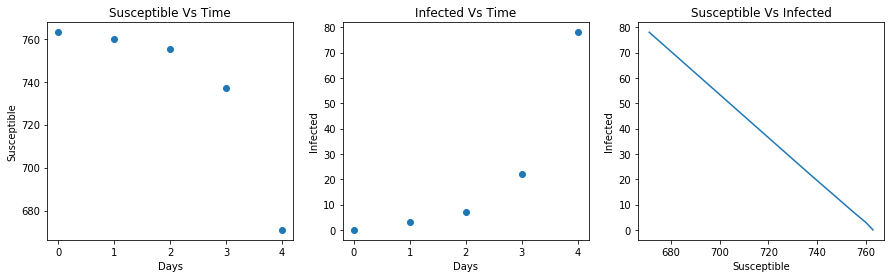

In [23]:
f, axes = plt.subplots(1,3, figsize=[15,4])

influenza_h = influenza.head(5)

axes[0].plot('day', 'sus', 'o', data = influenza_h)
axes[0].set_title('Susceptible Vs Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Susceptible')

axes[1].plot(influenza_h['day'], influenza_h['in_bed'],'o')
axes[1].set_title('Infected Vs Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Infected')

axes[2].plot(influenza_h['sus'], influenza_h['in_bed'])
axes[2].set_title('Susceptible Vs Infected')
axes[2].set_xlabel('Susceptible')
axes[2].set_ylabel('Infected')

Notice that the S vs I curve is linear. We might be able to leverage that! Lets translate that in terms of derivatives: If $\gamma = (S,I)$ is linear, than $I = aS + b$ so 

$$
a = \frac{dI}{dS}  = \frac{\frac{dI}{dt}}{\frac{dS}{dt}} = \frac{\beta S I - \gamma I}{-\beta SI} = -\frac{\beta  S - \gamma}{\beta S} = \frac{\gamma}{\beta S} - 1
$$

So

$$
a = \frac{0 - 7}{763 - 755} = -0.875
$$

and

$$
\beta = \frac{\gamma}{S(a + 1)} = \frac{.44}{763\times .125} = 0.00461
$$

Should we trust this number? Probably not, an notice that the susceptible number is actually suspect as well. Really, it's entirely possible that we have a bunch of people walking around who are still sick. In this case we should do everything we possibly can in terms of the infected curve. 

In [25]:
.44/(763*.125)

0.004613368283093054

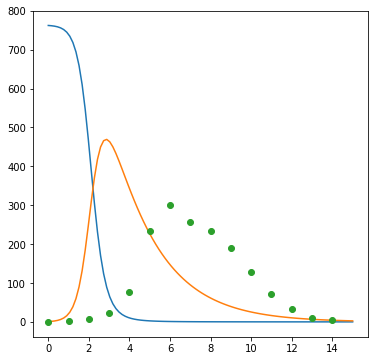

In [29]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,15,100)

sol = odeint(model, [762,1], t, (.44/(763*.125),.44))

plt.figure(figsize=[6,6])

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

Why is this still high? Well, because there is a discrepancy between the actual number of people who are sick  and the number of people in bed. So we actually expect $a$ to be  lower than it is. Really, we need to add some kind of incubation period. How would we do that?



### Preditor Prey Model:

## Snowshoe Hair and Lynx?

<img src = "https://esajournals.onlinelibrary.wiley.com/cms/asset/a751d037-30b3-499e-b90f-fa18c4858c55/bes21546-fig-0016-m.jpg">

**Periodic fluctuations of rabbit, lynx, and wolverine in Canada, 1820-1914. Hewitt 1921:217.**

Note: there is another commonly used data set in this investigation attributed to (Odum, 1953), however some authors caution that this data is actually a composite. For that dataset see here: http://people.whitman.edu/~hundledr/courses/M250F03/M250.html

Recall:

\begin{align*}
X' &= b X - c_1 XY
\\
Y' &= c_2 XY - d Y
\end{align*}

There dataset is one of the longest term ecology datasets known. It was taken as a bit of proof of the Lotka-Voltera equations. There is a big problem with it however: The predation goes backwards! Remember that we should have a counter clockwise spiral where prey become abundant and then predators. Here, the predators often become abundant before the prey. This would totally invalidate the equations. However, since there are parts

Okay, no matter, lets assume that this still works. How do we find the parameters? 

Recall that at the fixed point $(d/c_1,b/c_2)$ the eigenvalues are given by 

$$
\lambda = \pm i\sqrt {bd}
$$

so the period is

$$
T = 2\pi/\sqrt{bd}
$$


Frequency 

$$
\omega = \sqrt{bd}
$$

We can also relate $b$ and $d$ to the approximate growth when $Y$ is small or $X$ is large respectively. For the Lynx, it appears the population halves every year when  in unrestricted death, so we guess

$$
d = 0.6931
$$

For the rabbits, we are seeing roughly jumps of 1000 to 5000 in a year, 500 to 10000, so we might estimate 

$$
b = ln(10) = 2.30
$$

When the hare is at its peak, the average number of Lynx pelts is about 40,000, so 

$$
2.30 = 40,000 * c_1
$$

Similarly for the linx peaks we're at about 7,500, so

$$
0.6931 = 7,500 * c_2
$$

(array([0.00000000e+00, 4.00040004e-03, 8.00080008e-03, ...,
        3.99919992e+01, 3.99959996e+01, 4.00000000e+01]),
 array([40000.        , 40018.3162834 , 40036.30175096, ...,
         8553.20605191,  8547.93038793,  8542.67531362]))

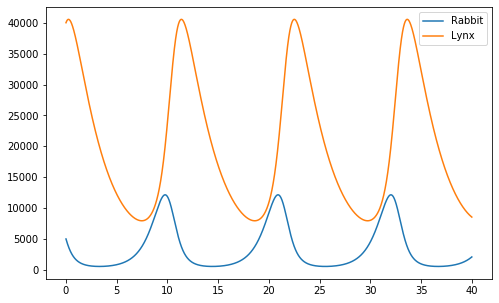

In [42]:
def model(Y, t, b, d, c1, c2):
    X1,X2 = Y
    return [b*X1 - c1*X1*X2, c2*X1*X2 -d*X2]

t = np.linspace(0,40,10000)

sol = odeint(model, [5000,40000], t, (2.30/2,0.6931/2, 5.75e-05,9.241e-05))

plt.figure(figsize=[8,5])

plt.plot(t, sol[:,0], label="Rabbit")
plt.plot(t, sol[:,1], label="Lynx")

plt.legend()

t, sol[:,1]

## Competing Species With Predator Prey

Set up equations, and show by example that the addition of a predator species can actually stablize prey populations:

\begin{align}
X' &= X(\beta_1  -c_1Y - d_1 X - e_1Z)
\\
Y' &= Y(\beta_2 - c_2X - d_2 Y - e_2Z)
\\
Z' &= Z(-\delta + r_1 X + r_2 Y)
\end{align}

Note, there are $2^3 = 8$ equalibrium points, exactly one of which has no nonzero species: (Draw Picture)

Three open questions:

* Under what conditions is $X_*$ in the positive coordinate cone $X_i>0$ for all $i$?
* Under what conditions is $X^*$ a stable point?
* What kinds of orbits are allowed (infact, the answer here id complicated: many kinds are, including chaotic attractors).

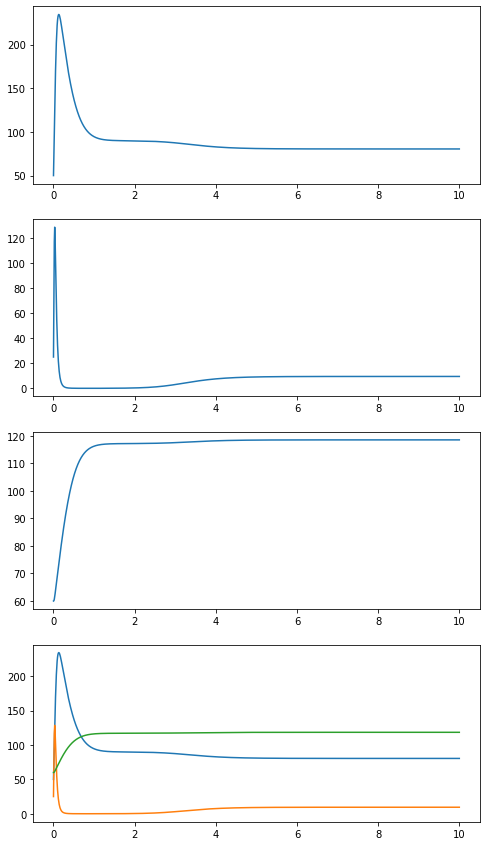

In [43]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

b1 = 100
b2 = 300
c1 = .1
c2 = .7
d1 = .2
d2 = .7

pd = .9
p1 = .01
p2 = .01
r1 = .7
r2 = 2

def model(X,t,ags):
    [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2] = ags
    [x,y,z] = X
    
    dXdt = [x*(b1 - d1*x - c1*y - r1*z),y*(b2-c2*x-d2*y-r2*z),z*(-pd+p1*x+p2*y)]
    return dXdt

X0 = [50,25,60]

t = np.linspace(0,10,1000)

ags = [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2]

sol = odeint(model, X0, t, args=(ags,))

f, axes = plt.subplots(4, figsize=(8, 15))

for i in range(3):
    axes[i].plot(t,sol[:,i])
    axes[3].plot(t,sol[:,i])